In [100]:
%load_ext autoreload
%autoreload 2
from mt.scan import Scan
from mt.ct_utils import SegmentationSettings
from mt.utils import print_image_info


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
path = "../../04_uCT/AD67/"
scan = Scan(path,
            discard_ends=True,
            downscale=True)
scan.load(logging=True, refresh=True)

Loading images from:  ../../04_uCT/AD67/Slices/
Loaded stack with shape (1781, 126, 2231) and a size of 1.00 GB in 2.04 s.
Loaded _mask from: ../../04_uCT/AD67/_mask.npy
Loaded _particle_mask from: ../../04_uCT/AD67/_particle_mask.npy
Loaded _tesselation from: ../../04_uCT/AD67/_tesselation.npy


In [95]:
scan.try_segmentation_settings()

In [4]:
# scan.try_segmentation_settings(segment_particles_only=True, subset_size=30)

In [108]:
particle_settings = SegmentationSettings(particle_mask_sigma=0.8,
                                particle_n_erosions=7,
                                particle_enlarge_radius=1)
general_settings = SegmentationSettings(air_mask_sigma=1.4,
                                air_thresh=120*2**8,
                                particle_mask_sigma=0.1,
                                particle_n_erosions=2,
                                particle_enlarge_radius=1,
                                smooth_labels_radius=1)
scan.set_particle_segmentation_settings(particle_settings)
scan.set_segmentation_settings(general_settings)

scan.segment()
# scan.segment_particles()
# scan.voronoi_tesselation()

In [84]:
55*2**8

14080

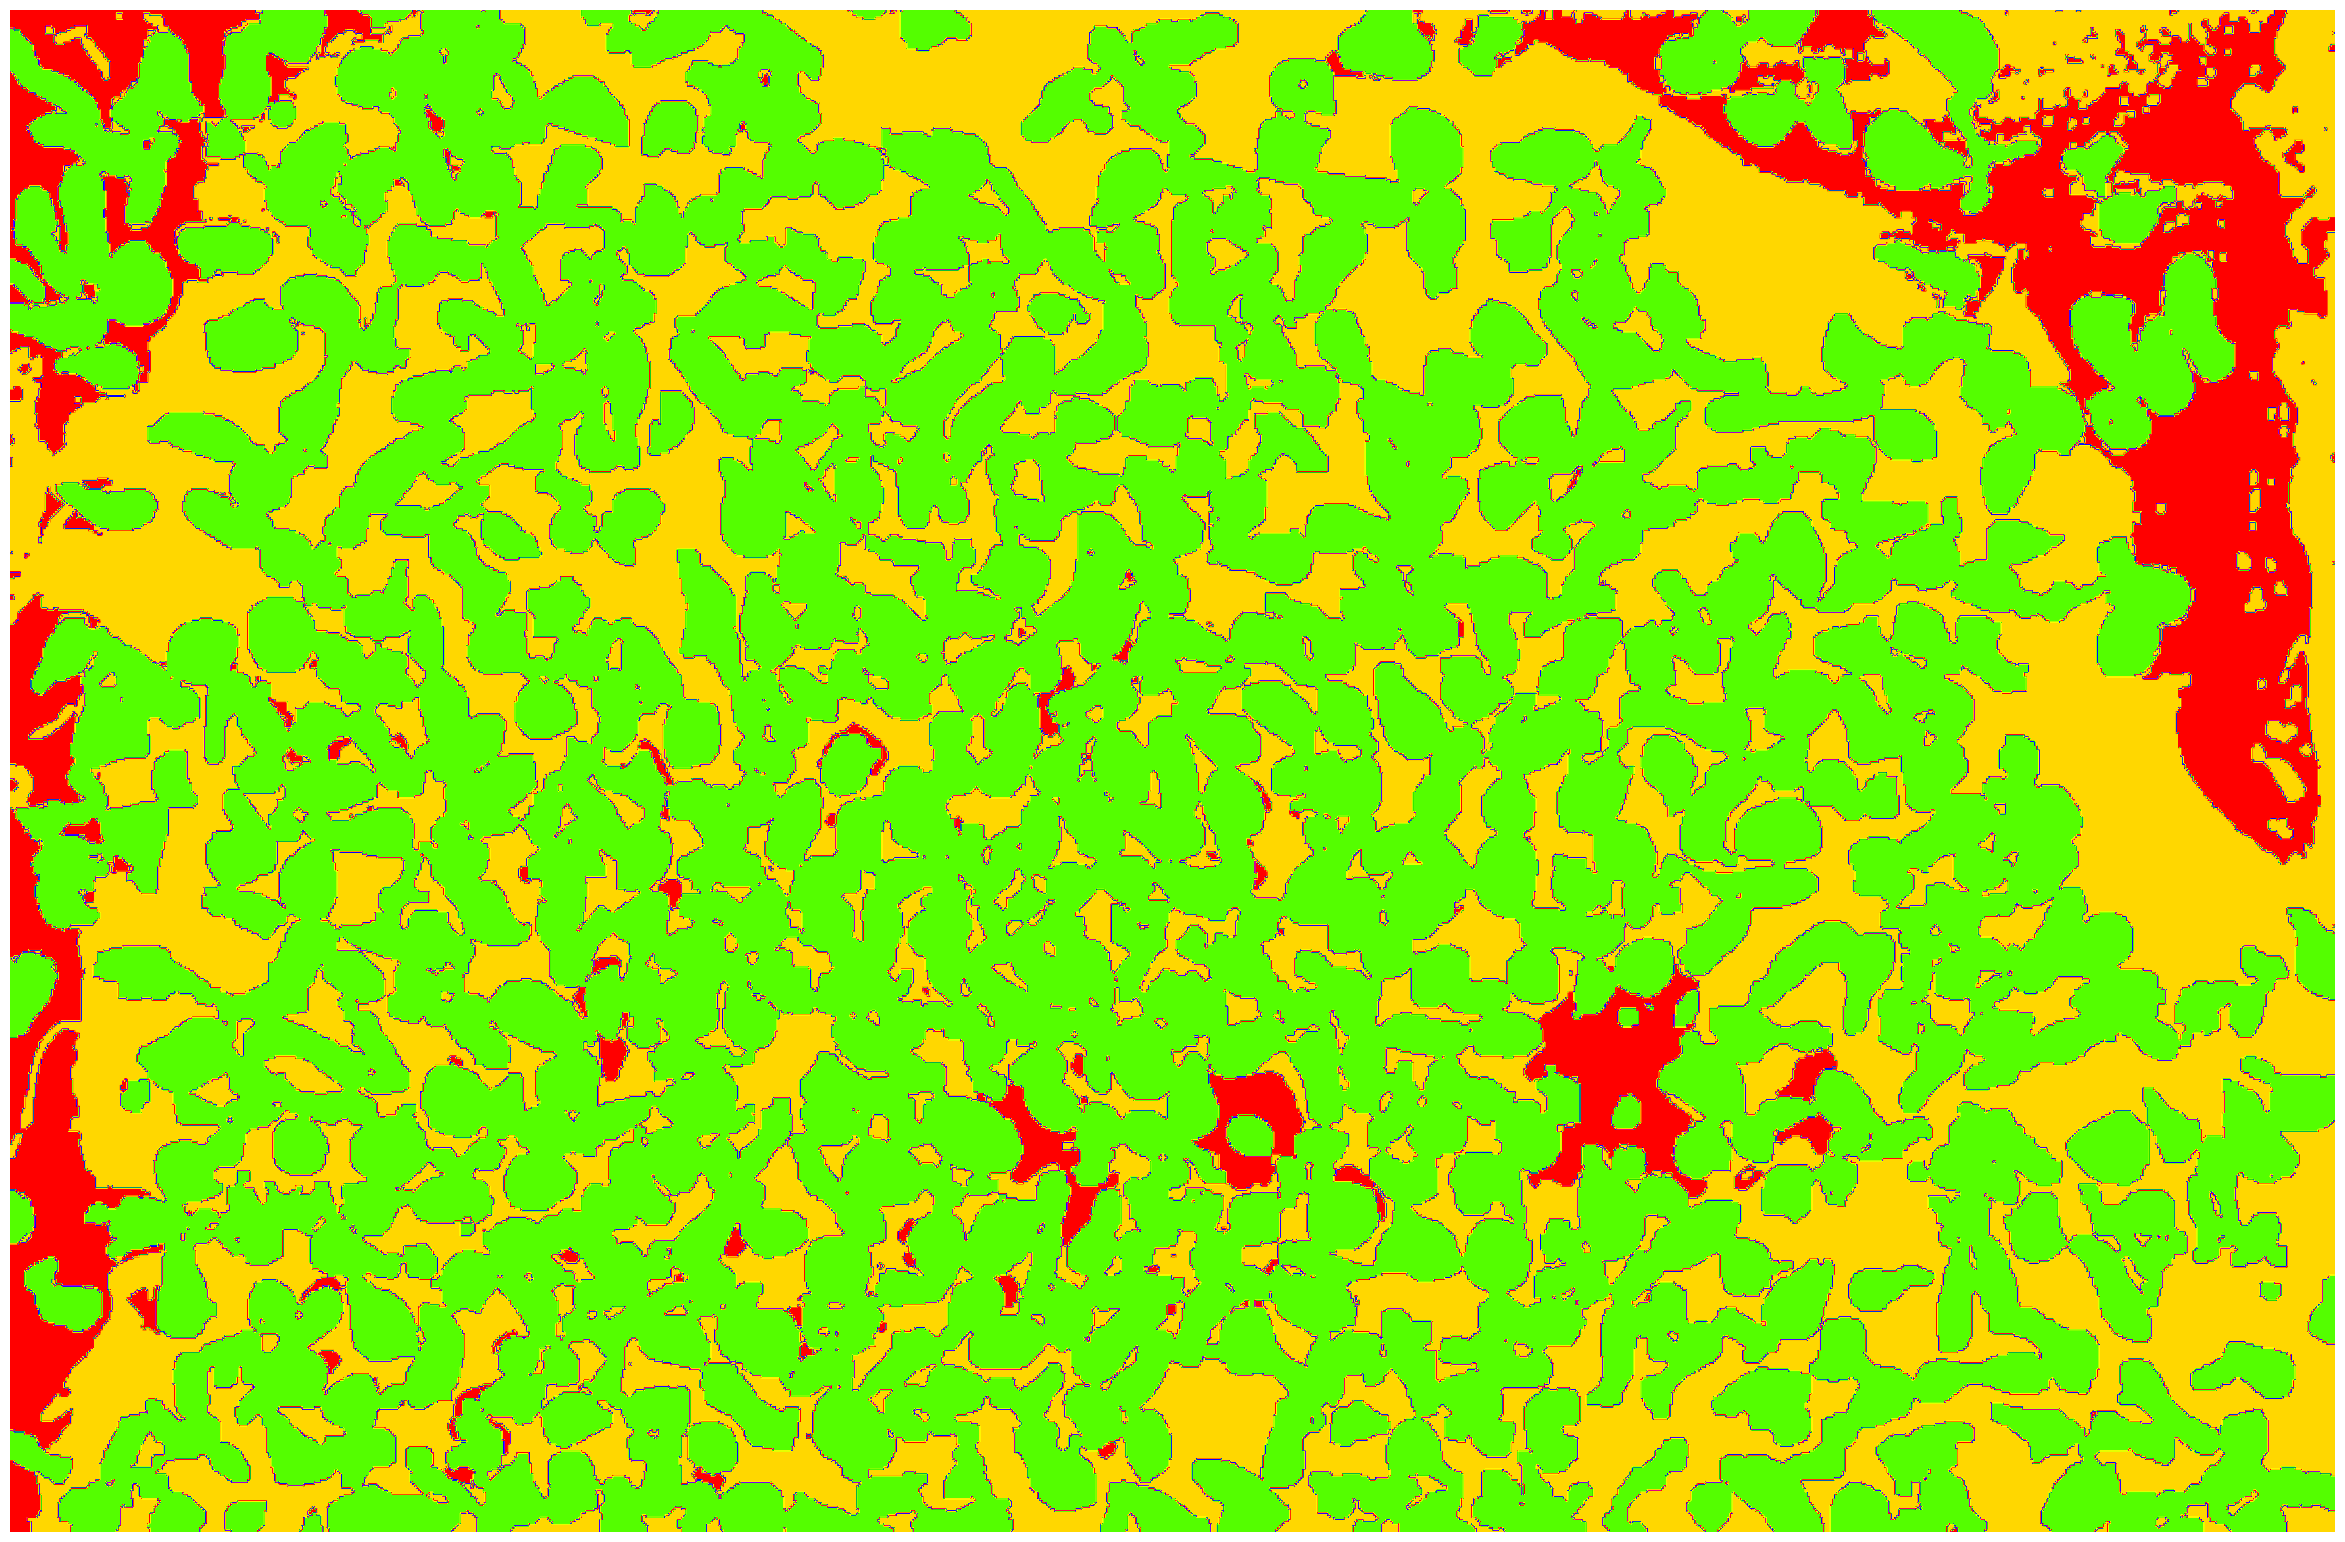

In [113]:
scan.show_nb("mask", alpha=1)

In [110]:
scan.show(axis="z")

In [102]:
print_image_info(scan.get_stack())

	 Shape: (731, 448, 1211)
	 Range: 17111-45431
	 Dtype: uint16
	 Unique: 20430


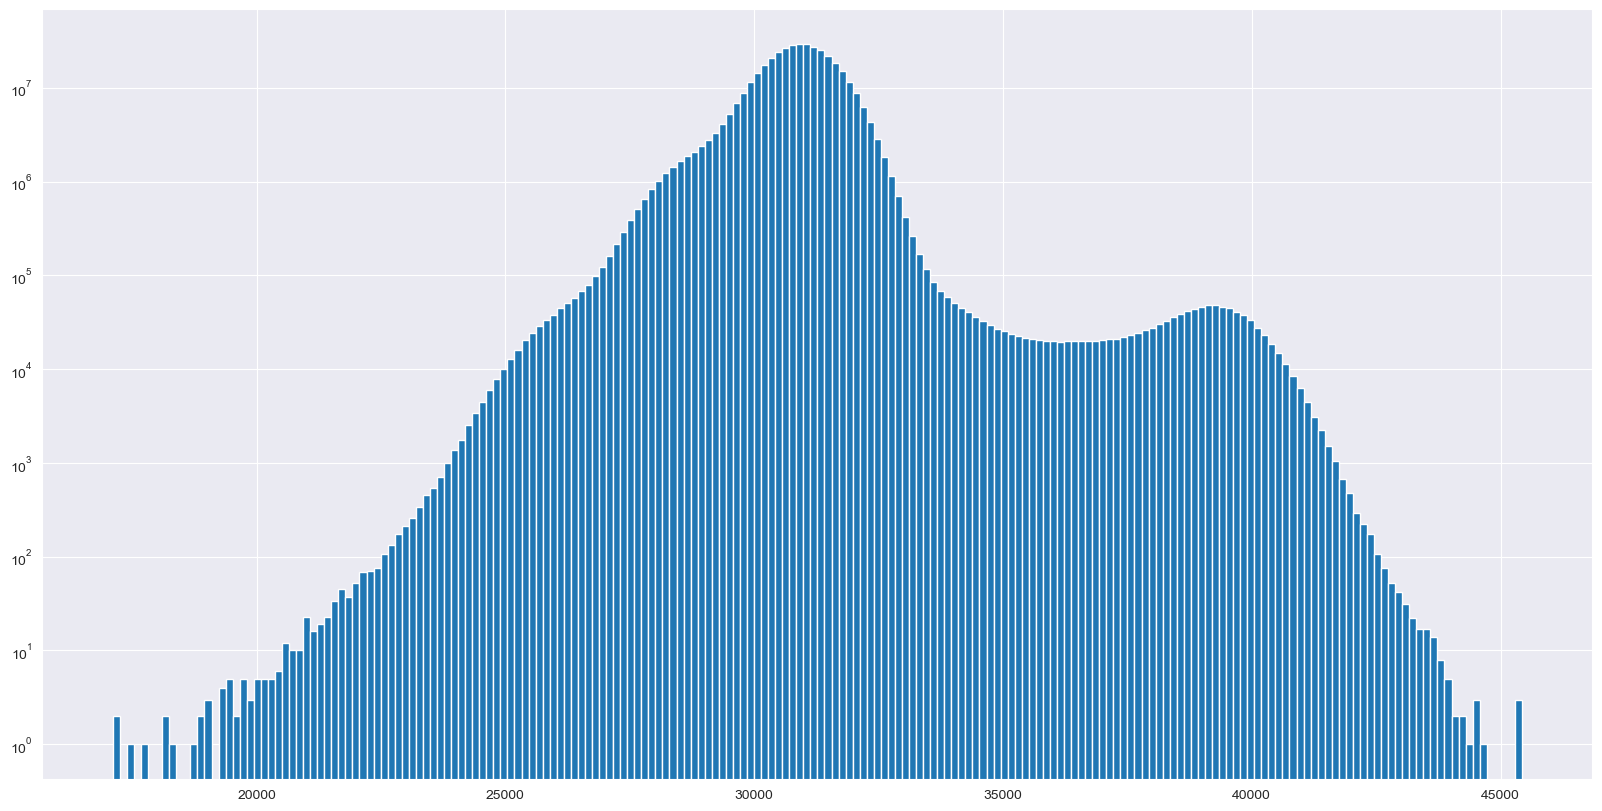

In [96]:
scan.show_hist()


In [11]:
scan.save()